# Hierarchical Clustering

Configure the project. Indeed you create a dataset in csv format.

In [1]:
! rm -rf *.csv
! unzip ./dataset/archive.zip
! mv *.csv data.csv

Archive:  ./dataset/archive.zip
  inflating: MathE dataset (4).csv   


Import needed libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics.pairwise import euclidean_distances

%matplotlib inline

# Make Sample to practice on K-Means

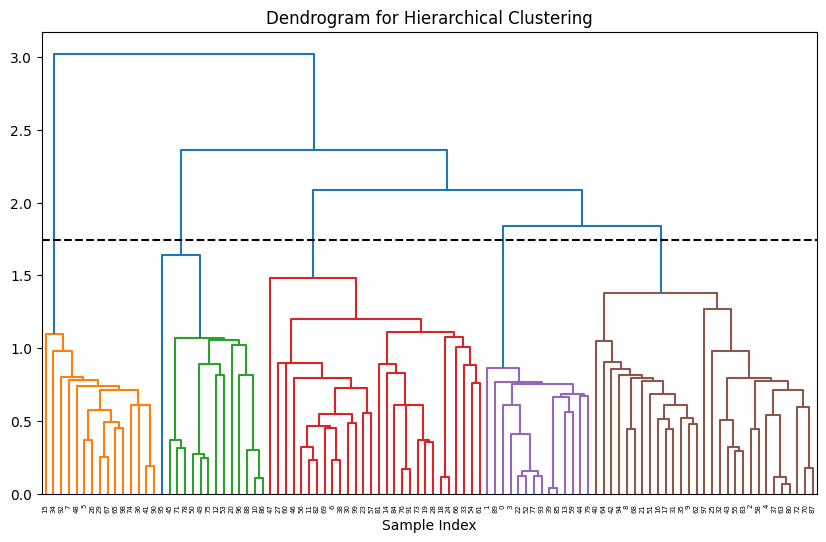

In [3]:
clusters_head = [[-4, 4], [5, 4], [-3, -1], [6, -4], [2, -3], [1, 1], [-5, -5]]
X, _ = make_blobs(n_samples=100, centers=clusters_head, cluster_std=0.9, random_state=40)

Z = linkage(X)
'''
linkage methods in hierarchical clustering can be considered similar to 
agglomerative clustering. In agglomerative clustering, each data point 
starts as an individual cluster, and pairs of clusters are merged step 
by step based on a linkage criterion until a single cluster is formed.

- Single linkage: Minimum distance between clusters.
- Complete linkage: Maximum distance between clusters.
- Average linkage: Average distance between clusters.
'''

plt.figure(figsize=(10, 6))

num_clusters = 5
max_d = Z[-num_clusters, 2]
dendrogram(Z, color_threshold=max_d)

line_margin = 0.1

plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Sample Index')
plt.axhline(y=max_d+line_margin, color='black', linestyle='--')
plt.show()

# Real Data

Read data from data.csv using pandas and store in data frame structure. Also shuffle data to have uniform distribution. 

In [4]:
df = pd.read_csv("data.csv", sep=";", encoding='ISO-8859-1')
df = df.sample(frac=1.0, random_state=42).reset_index(drop=True)
df.head()

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,751,Lithuania,568,0,Basic,Analytic Geometry,Analytic Geometry,"Cartesian equations of a plane,Cartesian equat..."
1,85,Lithuania,1144,1,Basic,Set Theory,Set Theory,Subset
2,37,Portugal,337,1,Basic,Complex Numbers,Complex Numbers,"Algebraic form,Principal argument,De Moivre fo..."
3,80,Lithuania,955,0,Basic,Optimization,Linear Optimization,Linear programming
4,966,Portugal,444,0,Basic,Linear Algebra,Linear Transformations,"Range,Kernel"


data cleaning

In [5]:
df = df.drop(columns=['Student ID', 'Keywords'])
print(df.columns)

Index(['Student Country', 'Question ID', 'Type of Answer', 'Question Level',
       'Topic', 'Subtopic'],
      dtype='object')


make data numeric

In [6]:
categorical_attr = ['Student Country', 'Question Level', 'Topic', 'Subtopic']

le = LabelEncoder()
df[categorical_attr] = df[categorical_attr].apply(le.fit_transform, axis=0)
df.head()


,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic
0,2,568,0,1,0,1
1,2,1144,1,1,12,21
2,3,337,1,1,1,2
3,2,955,0,1,9,13
4,3,444,0,1,7,15


In [7]:
num_entities = len(df)
num_unique_question_ids = df['Question ID'].nunique()

if num_entities == num_unique_question_ids:
    print("Each entity related to unique question")

In [8]:
# summarize data
df.describe() 

,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic
count,9546.000000,9546.000000,9546.000000,9546.000000,9546.000000,9546.000000
mean,2.747748,478.912319,0.468259,0.821705,6.197779,14.741043
std,1.322671,249.244061,0.499018,0.382781,2.717820,7.725488
min,0.000000,77.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,323.000000,0.000000,1.000000,4.000000,9.000000
50%,3.000000,428.000000,0.000000,1.000000,7.000000,15.000000
75%,3.000000,571.000000,1.000000,1.000000,7.000000,23.000000
max,7.000000,1549.000000,1.000000,1.000000,13.000000,23.000000


scale data from 0 to 1

In [9]:
X = df.values
scaled_x = MinMaxScaler().fit_transform(X)
scaled_x[-10:-5]

array([[0.14285714, 0.48029891, 1.        , 1.        , 0.53846154,
        0.65217391],
       [0.42857143, 0.24592391, 1.        , 0.        , 0.53846154,
        1.        ],
       [0.42857143, 0.23505435, 0.        , 1.        , 0.53846154,
        1.        ],
       [0.14285714, 0.03804348, 1.        , 0.        , 0.53846154,
        0.69565217],
       [0.42857143, 0.25611413, 0.        , 1.        , 0.53846154,
        1.        ]])

calculate euclidean distances matrix

In [10]:
dist_matrix = euclidean_distances(scaled_x,scaled_x) 
print(dist_matrix)

[[0.         1.66172614 1.02608114 ... 1.59356415 1.72632018 1.1847848 ]
 [1.66172614 0.         1.31124534 ... 0.84460709 0.71192234 0.787654  ]
 [1.02608114 1.31124534 0.         ... 1.11124386 1.34218407 0.62975975]
 ...
 [1.59356415 0.84460709 1.11124386 ... 0.         0.98835919 0.97426296]
 [1.72632018 0.71192234 1.34218407 ... 0.98835919 0.         0.82669249]
 [1.1847848  0.787654   0.62975975 ... 0.97426296 0.82669249 0.        ]]


In [11]:
Z = linkage(dist_matrix, 'complete')


/tmp/ipykernel_148084/1895303000.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, 'complete')


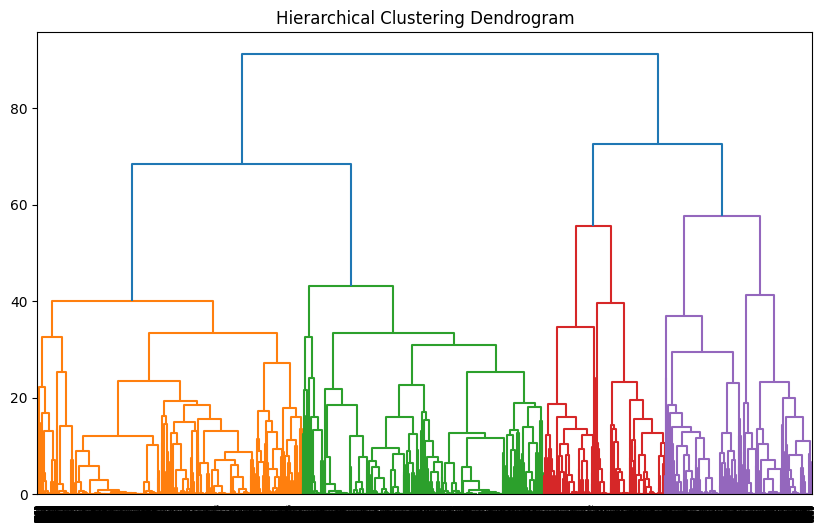

In [12]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### Lets split data in 2 cluster

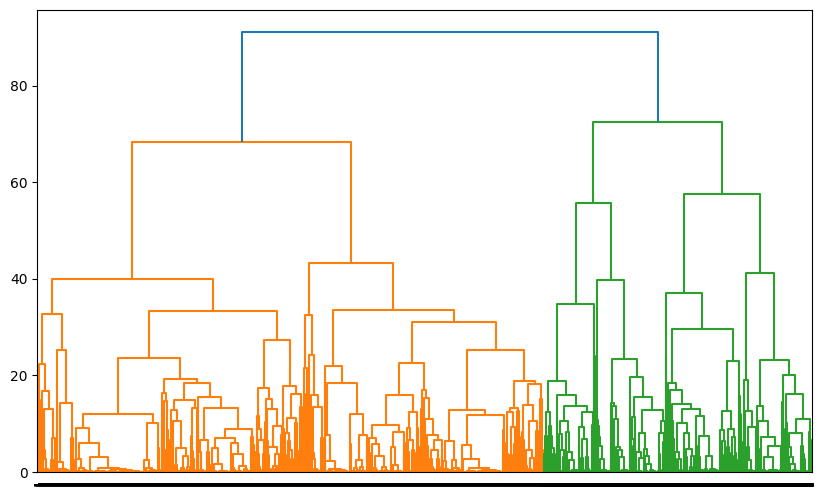

In [14]:
from scipy.cluster.hierarchy import fcluster

max_clusters = 2
clusters = fcluster(Z, max_clusters, criterion='maxclust')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=clusters, color_threshold=Z[-(max_clusters-1), 2])
plt.show()


<font color="green" size=5>
As you see data split into 2 clusters.
</font>

<hr>

### Lets see how many cluster exist in specific depth

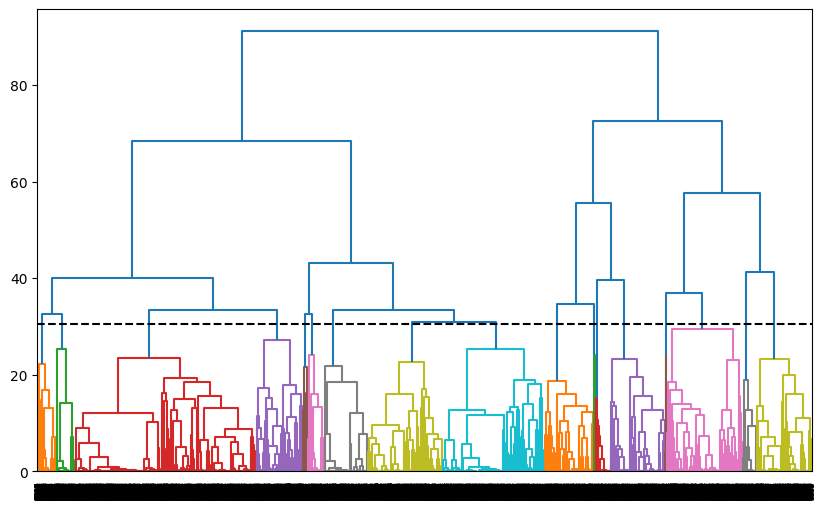

number of cluster that under 30 depth: 17


In [15]:

max_d = 30
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(set(clusters))
line_margin = 0.5

plt.figure(figsize=(10, 6))
dendrogram(Z, color_threshold=Z[-(num_clusters-1), 2])
plt.axhline(y=max_d+line_margin, color='black', linestyle='--')
plt.show()
print(f"number of cluster that under {max_d} depth: {num_clusters}")